In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set the datset path
data_path=r"C:\\Users\\Manny B\\Downloads\\diabetes.csv"

In [3]:
# Read the dataset
df = pd.read_csv(data_path)

# Take a random sample of 25 observations
sample_df = df.sample(n=25, random_state=42)  # Setting a random_state for reproducibility

In [4]:
# Compute population statistics
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

In [5]:
# Compute sample statistics
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

In [6]:
# Print statistics
print(f"Population Mean Glucose: {pop_mean_glucose:.2f}")
print(f"Population Max Glucose: {pop_max_glucose:.2f}")
print(f"Sample Mean Glucose: {sample_mean_glucose:.2f}")
print(f"Sample Max Glucose: {sample_max_glucose:.2f}")

Population Mean Glucose: 120.89
Population Max Glucose: 199.00
Sample Mean Glucose: 116.64
Sample Max Glucose: 183.00


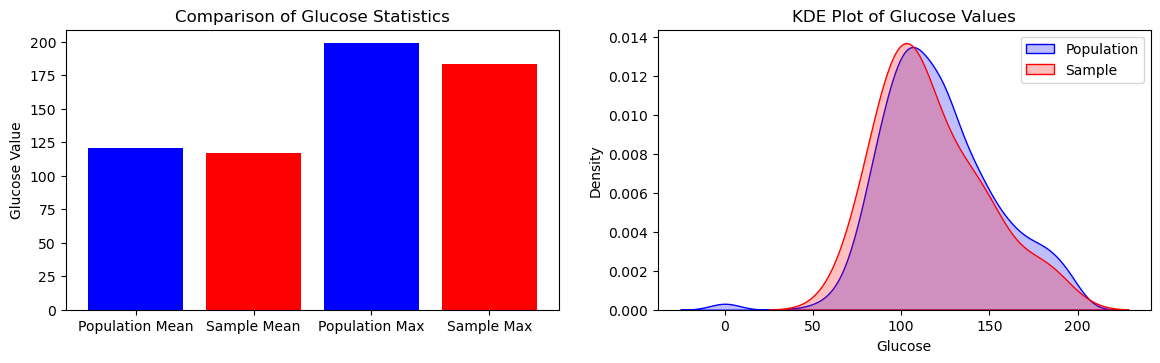

In [7]:
# Create charts for comparison
labels = ['Population Mean', 'Sample Mean', 'Population Max', 'Sample Max']
values = [pop_mean_glucose, sample_mean_glucose, pop_max_glucose, sample_max_glucose]

plt.figure(figsize=(14, 8))

# Bar chart
plt.subplot(2, 2, 1)
plt.bar(labels, values, color=['blue', 'red', 'blue', 'red'])
plt.ylabel('Glucose Value')
plt.title('Comparison of Glucose Statistics')

# KDE Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['Glucose'], label='Population', color='blue', fill=True)
sns.kdeplot(sample_df['Glucose'], label='Sample', color='red', fill=True)
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.title('KDE Plot of Glucose Values')
plt.legend()

plt.show()

In [8]:
# Compute 98th percentile for BMI
population_98th_percentile_bmi = df['BMI'].quantile(0.98)
sample_98th_percentile_bmi = sample_df['BMI'].quantile(0.98)

In [9]:
print(f"Population 98th Percentile BMI: {population_98th_percentile_bmi:.2f}")
print(f"Sample 98th Percentile BMI: {sample_98th_percentile_bmi:.2f}")

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 40.25


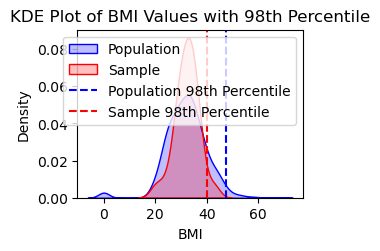

In [10]:
# KDE Plot for BMI values with 98th Percentile
plt.subplot(2, 2, 3)
sns.kdeplot(df['BMI'], label='Population', color='blue', fill=True)
sns.kdeplot(sample_df['BMI'], label='Sample', color='red', fill=True)
plt.axvline(population_98th_percentile_bmi, color='blue', linestyle='--', label='Population 98th Percentile')
plt.axvline(sample_98th_percentile_bmi, color='red', linestyle='--', label='Sample 98th Percentile')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('KDE Plot of BMI Values with 98th Percentile')
plt.legend()

In [11]:
# Bootstrap sampling
num_samples = 500
sample_size = 150

# Arrays to store the statistics from each bootstrap sample
bootstrap_means = []
bootstrap_stds = []
bootstrap_98th_percentiles = []

In [12]:
# Perform bootstrap sampling
for _ in range(num_samples):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_98th_percentiles.append(sample.quantile(0.98))

In [13]:
# Compute statistics for the population
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_98th_percentile_bp = df['BloodPressure'].quantile(0.98)

# Compute average statistics from bootstrap samples
average_mean_bp = np.mean(bootstrap_means)
average_std_bp = np.mean(bootstrap_stds)
average_98th_percentile_bp = np.mean(bootstrap_98th_percentiles)

In [14]:
# Print statistics
print(f"Population Mean BloodPressure: {population_mean_bp:.2f}")
print(f"Population Standard Deviation BloodPressure: {population_std_bp:.2f}")
print(f"Population 98th Percentile BloodPressure: {population_98th_percentile_bp:.2f}")

print(f"Average Bootstrap Sample Mean BloodPressure: {average_mean_bp:.2f}")
print(f"Average Bootstrap Sample Standard Deviation BloodPressure: {average_std_bp:.2f}")
print(f"Average Bootstrap Sample 98th Percentile BloodPressure: {average_98th_percentile_bp:.2f}")

Population Mean BloodPressure: 69.11
Population Standard Deviation BloodPressure: 19.36
Population 98th Percentile BloodPressure: 99.32
Average Bootstrap Sample Mean BloodPressure: 69.12
Average Bootstrap Sample Standard Deviation BloodPressure: 19.19
Average Bootstrap Sample 98th Percentile BloodPressure: 97.95


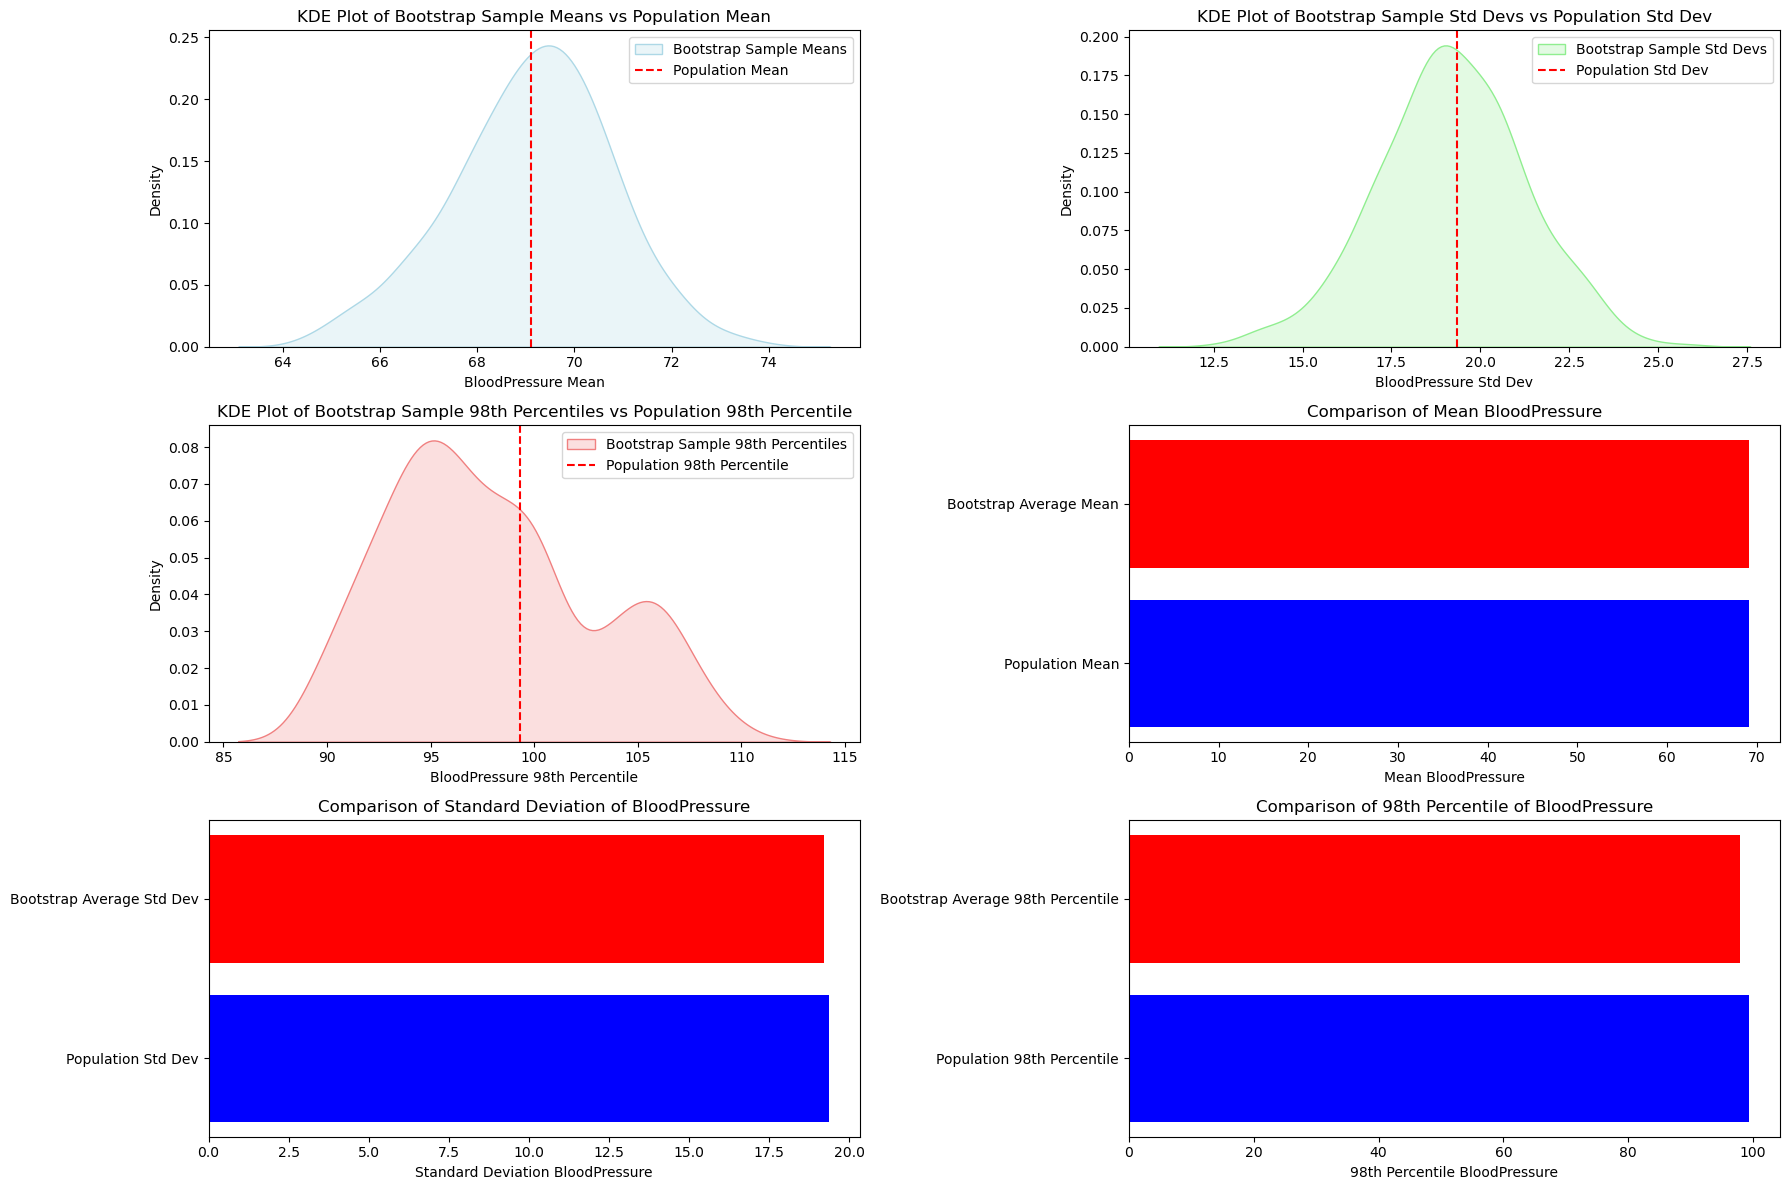

In [18]:

# Plot KDEs for Bootstrap vs Population
plt.figure(figsize=(18, 12))

# KDE Plot for Bootstrap Sample Means vs Population Mean
plt.subplot(3, 2, 1)
sns.kdeplot(bootstrap_means, label='Bootstrap Sample Means', color='lightblue', fill=True)
plt.axvline(population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.xlabel('BloodPressure Mean')
plt.ylabel('Density')
plt.title('KDE Plot of Bootstrap Sample Means vs Population Mean')
plt.legend()

# KDE Plot for Bootstrap Sample Standard Deviations vs Population Std Dev
plt.subplot(3, 2, 2)
sns.kdeplot(bootstrap_stds, label='Bootstrap Sample Std Devs', color='lightgreen', fill=True)
plt.axvline(population_std_bp, color='red', linestyle='--', label='Population Std Dev')
plt.xlabel('BloodPressure Std Dev')
plt.ylabel('Density')
plt.title('KDE Plot of Bootstrap Sample Std Devs vs Population Std Dev')
plt.legend()

# KDE Plot for Bootstrap Sample 98th Percentiles vs Population 98th Percentile
plt.subplot(3, 2, 3)
sns.kdeplot(bootstrap_98th_percentiles, label='Bootstrap Sample 98th Percentiles', color='lightcoral', fill=True)
plt.axvline(population_98th_percentile_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.xlabel('BloodPressure 98th Percentile')
plt.ylabel('Density')
plt.title('KDE Plot of Bootstrap Sample 98th Percentiles vs Population 98th Percentile')
plt.legend()

# Horizontal Bar Chart for Comparison of Means
plt.subplot(3, 2, 4)
labels = ['Population Mean', 'Bootstrap Average Mean']
values = [population_mean_bp, average_mean_bp]
plt.barh(labels, values, color=['blue', 'red'])
plt.xlabel('Mean BloodPressure')
plt.title('Comparison of Mean BloodPressure')

# Horizontal Bar Chart for Comparison of Standard Deviations
plt.subplot(3, 2, 5)
labels = ['Population Std Dev', 'Bootstrap Average Std Dev']
values = [population_std_bp, average_std_bp]
plt.barh(labels, values, color=['blue', 'red'])
plt.xlabel('Standard Deviation BloodPressure')
plt.title('Comparison of Standard Deviation of BloodPressure')

# Horizontal Bar Chart for Comparison of 98th Percentiles
plt.subplot(3, 2, 6)
labels = ['Population 98th Percentile', 'Bootstrap Average 98th Percentile']
values = [population_98th_percentile_bp, average_98th_percentile_bp]
plt.barh(labels, values, color=['blue', 'red'])
plt.xlabel('98th Percentile BloodPressure')
plt.title('Comparison of 98th Percentile of BloodPressure')

plt.tight_layout()
plt.show()